(a)

In [1]:
import torchvision as thv
import numpy as np
train = thv.datasets.MNIST ('./', download =True , train =True)
val = thv.datasets.MNIST ('./', download =True , train = False )
print( train .data.shape , len( train . targets ))
train.data, train.targets, val.data, val.targets = train.data.numpy(), train.targets.numpy(), val.data.numpy(), val.targets.numpy()

  2%|▏         | 163840/9912422 [00:00<00:01, 7055822.41it/s]

KeyboardInterrupt: ignored

In [ ]:
# get 50% train and validation data from each class
new_train,new_val = [],[]
train = np.column_stack((train.data.reshape(60000,784),train.targets))
val = np.column_stack((val.data.reshape(10000,784),val.targets))
for i in range(10):
  tmp_train = train[np.where(train[:,-1]==i)]
  tmp_val = val[np.where(val[:,-1]==i)]
  indices1 = np.random.choice(len(tmp_train), 3000, replace = False)
  indices2 = np.random.choice(len(tmp_val), 500, replace = False)
  new_train.append(tmp_train[indices1,:])
  new_val.append(tmp_val[indices2,:])
new_train,new_val = np.array(new_train).reshape(30000,785), np.array(new_val).reshape(5000,785)
np.random.shuffle(new_train)
np.random.shuffle(new_val)
x_train, y_train = new_train[:,:-1], new_train[:,-1]
x_val, y_val = new_val[:,:-1], new_val[:,-1]


7


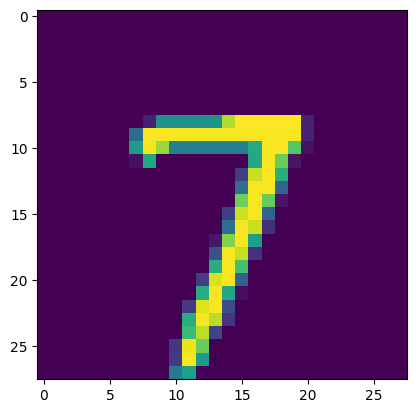

In [ ]:
import matplotlib.pyplot as plt
a = x_train[28]. reshape ((28 ,28))
plt. imshow (a)
print(y_train[28])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

(b)

In [ ]:
class linear_t :
  def __init__ (self, a, c):
    # initialize to appropriate sizes , fill with Gaussian entires
    # normalize to make the Frobenius norm of w, b equal to 1
    self.w, self.b = np.random.rand(c, a), np.random.rand(c,1)
    self.w /= np.linalg.norm(self.w, ord = 'fro')
    self.b /= np.linalg.norm(self.b, ord = 'fro')
    self.h = None
    self.dw = None
    self.db = None



  def forward(self, h):
        # Compute the forward propagation
        new_h =  h @ self.w.T + np.repeat(self.b.T, h.shape[0], axis = 0)

        # Cache h in forward for backward propagation
        self.h = h

        return new_h

  def backward(self, dh):
        # Compute the backward propagation
        old_dh = dh @ self.w
        dw = dh.T @ self.h
        db = dh.T.mean(axis=1, keepdims=True)

        self.dw, self.db = dw, db

        return old_dh

  def zero_grad(self):
        self.dw, self.db = self.dw * 0 , self.db * 0

(c)

In [ ]:
class relu_t:
  def __init__ (self):
    # no parameters , nothing to initialize
    pass

  def forward(self, h):
    # Compute the forward propagation
    new_h = np.maximum(0, h)

    # Cache input for backward propagation
    self.h = h

    return new_h


  def backward(self, dh):
    # Compute the backward propagation
    old_dh = dh * np.heaviside(self.h, 0)
    return old_dh

  def zero_grad(self):
    pass


(d)

In [ ]:
class softmax_cross_entropy_t:
  def __init__(self):
    # no parameters , nothing to initialize
    pass

  def forward(self, h, y):

    # calculate forward propagation
    h_exp = np.exp(h)
    h_softmax = h_exp / np.sum(h_exp, axis=1, keepdims=True)

    # cache paramters
    self.softmax_probs = h_softmax
    self.y = y

    # compute average loss ell
    bt = h.shape[0]
    log_likelihood = -np.log(h_softmax[range(bt),y])
    ell = np.sum(log_likelihood) / bt


    # compute error
    predictions = np.argmax(h_softmax, axis=1)
    error = np.mean(predictions != y)

    return ell, error



  def backward(self):
    dh = self.softmax_probs
    bt = self.y.shape[0]
    dh[range(bt),self.y] -= 1
    old_dh = dh/bt
    return old_dh

  def zero_grad(self):
    pass

(e)

In [ ]:
def check_gradients(layer, input, epsilon=1e-2):
    checks = 10
    num_k = 5

    for c in range(checks):
      i, j = np.random.randint(0, layer.w.shape[0]), np.random.randint(0, layer.w.shape[1])
      k_sample = np.random.choice(layer.w.shape[0], num_k)

      for k in k_sample:
        w = layer.w
        b = layer.b

        layer.w[i, j] += epsilon
        h_plus = layer.forward(x)

        layer.w = w
        layer.b = b

        layer.w[i, j] -= epsilon
        h_minus = layer.forward(x)

        w = layer.w
        b = layer.b

        #finite difference
        finite_diff = (h_plus[k] - h_minus[k]) / (2 * epsilon)

        # Compute the gradient using the backward pass
        dh = np.zeros_like(h_plus)
        dh[k] = 1
        dhl= layer.backward(dh)
        dw = layer.dw
        db = layer.db

        # Compare finite differences estimate with the computed gradient
        error = np.linalg.norm(np.abs(dw[i,j] - finite_diff)/784)
        if (error < epsilon):
          print("passed",i,j)

        layer.zero_grad()


input_size = 784
output_size = 10
linear = linear_t(input_size, output_size)

# Input data
x = np.random.rand(32,input_size)

# Check gradients
check_gradients(linear, x)

passed 2 541
passed 2 541
passed 2 541
passed 2 541
passed 2 541
passed 1 605
passed 1 605
passed 1 605
passed 1 605
passed 1 605
passed 3 592
passed 3 592
passed 3 592
passed 3 592
passed 3 592
passed 6 747
passed 6 747
passed 6 747
passed 6 747
passed 6 747
passed 1 116
passed 1 116
passed 1 116
passed 1 116
passed 1 116
passed 1 527
passed 1 527
passed 1 527
passed 1 527
passed 1 527
passed 0 542
passed 0 542
passed 0 542
passed 0 542
passed 0 542
passed 7 237
passed 7 237
passed 7 237
passed 7 237
passed 7 237
passed 9 526
passed 9 526
passed 9 526
passed 9 526
passed 9 526
passed 9 450
passed 9 450
passed 9 450
passed 9 450
passed 9 450


(f) and (g) loop

In [ ]:
def validate(w, b, l1, l2, l3):
  loss = 0
  error = 0

  # Iterate over mini-batches from the validation dataset
  for i in range(0, len(x_val), 32):
      x = x_val[i:i+32]
      y = y_val[i:i+32]

      # Forward pass
      h1 = l1.forward(x)
      h2 = l2.forward(h1)
      val_loss, val_error = l3.forward(h2, y)

      loss += val_loss
      error += val_error

  # Calculate the average loss and error
  average_loss = loss / (len(x_val) // 32)
  average_error = error / (len(x_val) // 32)

  return average_loss, average_error

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize layers
l1 = linear_t(784, 10)
l2 = relu_t()
l3 = softmax_cross_entropy_t()
net = [l1, l2, l3]

# Hyperparameters
lr = 1e-2  # Learning rate
num_iter = 30000  # Number of weight updates
batch_size = 1000 # Mini-batch size

# Lists to store loss and error
training_loss = []
training_error = []
val_loss = []
val_error = []


for iter in range(num_iter):
    # 1. Sample mini-batch
    indices = np.random.choice(len(x_train), batch_size, replace=False)
    x_batch = x_train[indices]
    y_batch = y_train[indices]

    # Forward pass
    h1 = l1.forward(x_batch)
    h2 = l2.forward(h1)
    loss, error = l3.forward(h2, y_batch)

    # Backward pass
    dh2 = l3.backward()
    dh1 = l2.backward(dh2)
    dh0 = l1.backward(dh1)

    # get gradients
    dw, db = l1.dw, l1.db

    # 6. print logs
    if iter % 500 == 0:
      print(f"Iteration {iter}:", "Loss =", loss, "Error =", error)
      training_loss.append(loss)
      training_error.append(error)

    if iter %1000 == 0:
      val_l, val_err = validate(l1.w, l1.b, l1, l2, l3)
      val_loss.append(val_l)
      val_error.append(val_err)


    # Update weights and biases
    l1.w -= lr * dw
    l1.b -= lr * db

    # Zero gradient buffer
    for l in net:
      l.zero_grad()


print("The average loss is:", np.mean(loss))
print("The average error is:",np.mean(error)*100,"%")

Iteration 0: Loss = 2.311042843724208 Error = 0.935
Iteration 500: Loss = 0.8018487268323188 Error = 0.164
Iteration 1000: Loss = 0.6226302927030692 Error = 0.126
Iteration 1500: Loss = 0.5097302812815085 Error = 0.122
Iteration 2000: Loss = 0.5060735447112806 Error = 0.133
Iteration 2500: Loss = 0.4634695964012584 Error = 0.121
Iteration 3000: Loss = 0.4355524610811555 Error = 0.116
Iteration 3500: Loss = 0.42096231073726836 Error = 0.109
Iteration 4000: Loss = 0.41963735877083236 Error = 0.109
Iteration 4500: Loss = 0.3793605188649434 Error = 0.11
Iteration 5000: Loss = 0.3922256847532534 Error = 0.105
Iteration 5500: Loss = 0.4051056036293035 Error = 0.107
Iteration 6000: Loss = 0.408765096092531 Error = 0.115
Iteration 6500: Loss = 0.3932067625481408 Error = 0.102
Iteration 7000: Loss = 0.3893868616927261 Error = 0.104
Iteration 7500: Loss = 0.36415016801357253 Error = 0.103
Iteration 8000: Loss = 0.38189921274940275 Error = 0.115
Iteration 8500: Loss = 0.38290690390829685 Error = 

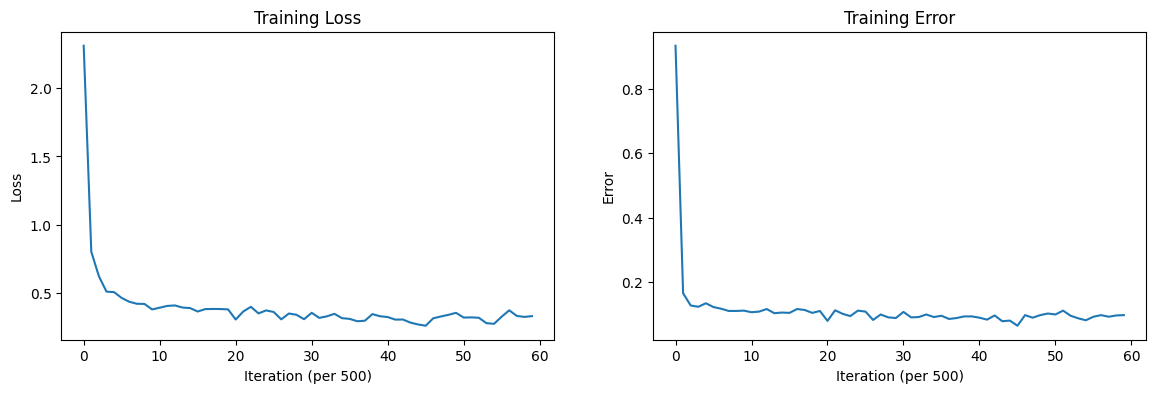

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(training_loss)
plt.title("Training Loss")
plt.xlabel("Iteration (per 500)")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(training_error)
plt.title("Training Error")
plt.xlabel("Iteration (per 500)")
plt.ylabel("Error")
plt.show()

(g) plot

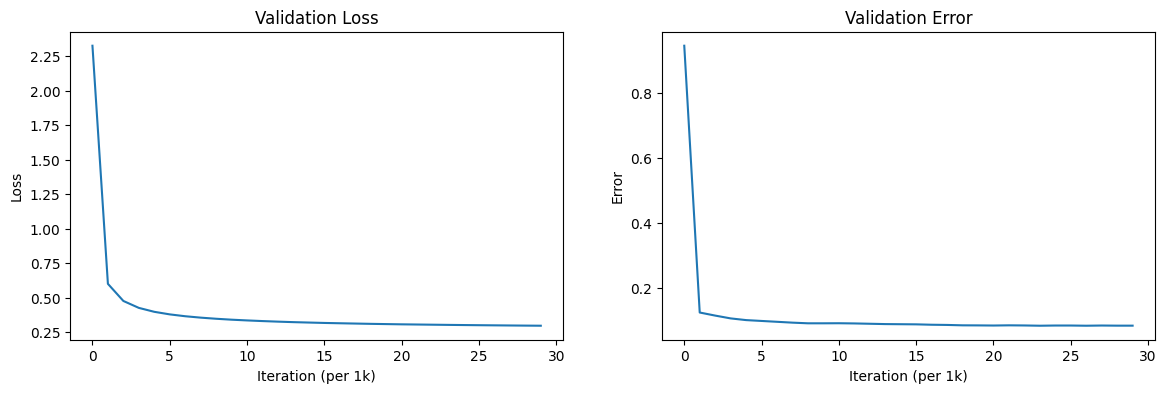

In [ ]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(val_loss)
plt.title("Validation Loss")
plt.xlabel("Iteration (per 1k)")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(val_error)
plt.title("Validation Error")
plt.xlabel("Iteration (per 1k)")
plt.ylabel("Error")
plt.show()

(h)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define a neural network
class Network(nn.Module):
    def __init__(self, a, hidden, c):
        super(Network, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(a, hidden),
            nn.ReLU(),
            nn.Linear(hidden, c)
        )

    def forward(self, x):
        x = self.linear_relu_stack(x)
        return x

# Hyperparameters
a = 784
hidden = 512
c = 10
learning_rate = 0.01
batch_size = 100
iterations = 30000

# Create the network
model = Network(a, hidden, c)

# Loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Lists to store training and validation results
train_loss= []
train_error = []
val_loss = []
val_error = []

# Training loop
for iter in range(iterations):
    # Sample a mini-batch
    indices = np.random.choice(len(x_train), batch_size, replace=False)
    x_batch = torch.Tensor(x_train[indices])
    y_batch = torch.LongTensor(y_train[indices])

    # Forward pass
    train_result = model(x_batch)

    # Compute loss
    loss = loss_fn(train_result, y_batch)

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Compute training error
    _, train_pred = torch.max(train_result.data, 1)
    wrong = (train_pred != y_batch).sum().item()
    train_err = wrong / batch_size


    # Validation every 1000 weight updates
    if iter % 1000 == 0:
      train_loss.append(loss.item())
      train_error.append(train_err)

      # Compute validation loss and error
      val_l = 0
      val_err = 0
      with torch.no_grad():
          for i in range(0, len(x_val), 32):
              x_val_batch = torch.Tensor(x_val[i:i+32])
              y_val_batch = torch.LongTensor(y_val[i:i+32])

              val_result = model(x_val_batch)
              val_l += loss_fn(val_result, y_val_batch).item()

              _, val_pred = torch.max(val_result.data, 1)
              val_wrong = (val_pred != y_val_batch).sum().item()
              val_err += val_wrong / batch_size

      val_l = val_l / (len(x_val) // batch_size)
      val_err = val_err / (len(x_val) // batch_size)

      val_loss.append(val_l)
      val_error.append(val_err)

      print(f"Iteration {iter}: Train Loss = {loss.item()}, Train Error = {train_err}, "
            f"Validation Loss = {val_l}, Validation Error = {val_err}")

Iteration 0: Train Loss = 2.296433448791504, Train Error = 0.89, Validation Loss = 7.235189099311828, Validation Error = 0.8867999999999998
Iteration 1000: Train Loss = 0.6410192251205444, Train Error = 0.18, Validation Loss = 1.697558219432831, Validation Error = 0.12739999999999982
Iteration 2000: Train Loss = 0.39581191539764404, Train Error = 0.09, Validation Loss = 1.2086793208122253, Validation Error = 0.10059999999999981
Iteration 3000: Train Loss = 0.37251850962638855, Train Error = 0.11, Validation Loss = 1.0492139592766763, Validation Error = 0.09219999999999987
Iteration 4000: Train Loss = 0.32470035552978516, Train Error = 0.11, Validation Loss = 0.964788393676281, Validation Error = 0.08679999999999989
Iteration 5000: Train Loss = 0.27298861742019653, Train Error = 0.06, Validation Loss = 0.9092018235474825, Validation Error = 0.08339999999999989
Iteration 6000: Train Loss = 0.25314271450042725, Train Error = 0.07, Validation Loss = 0.8596668489277363, Validation Error = 0

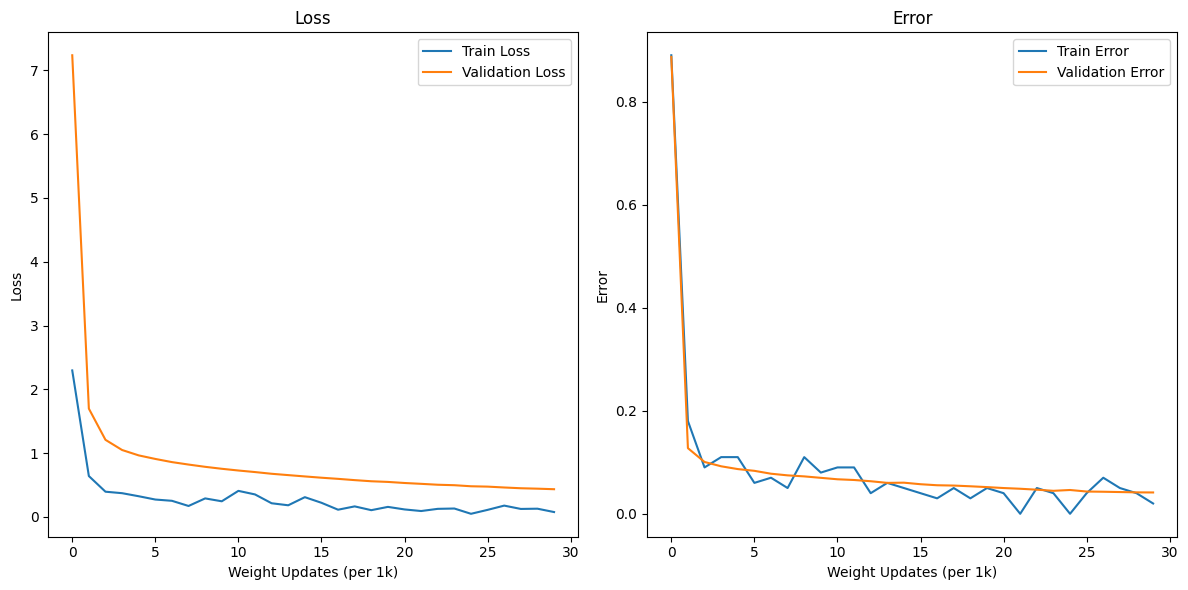

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel("Weight Updates (per 1k)")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss")

plt.subplot(1, 2, 2)
plt.plot(train_error, label='Train Error')
plt.plot(val_error, label='Validation Error')
plt.xlabel("Weight Updates (per 1k)")
plt.ylabel("Error")
plt.legend()
plt.title("Error")

plt.tight_layout()
plt.show()